# Deep Learning Approach
- https://learning.oreilly.com/library/view/machine-learning-using/9781800208865/Text/Chapter_4.xhtml#_idParaDest-126


In [113]:
import pandas as pd
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [134]:
## read in data, drop cols, separate into X, y
df = pd.read_csv("data/dataModel.csv")

In [135]:
## make labels for artist name, prob an important feature
le = LabelEncoder()

df["ArtistName"] = le.fit_transform(df.ArtistName)
df.drop("Title", axis=1, inplace=True)
df.head()

,ArtistName,KeySignatureConfidence,TimeSignatureConfidence,Year,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2678,0.591,0.372,2008,19.0,0.656,0.487,0.0,-9.344,1.0,0.0360,0.077800,0.056300,0.108,0.0385,123.974,148701.0,4.0
1,1735,0.429,0.533,2004,3.0,0.341,0.316,1.0,-8.922,0.0,0.0335,0.886000,0.000012,0.104,0.1680,80.283,253000.0,4.0
2,3176,0.000,0.000,0,4.0,0.514,0.203,7.0,-15.443,1.0,0.0350,0.906000,0.830000,0.139,0.5400,83.179,240400.0,4.0
3,1441,0.380,0.369,2007,1.0,0.192,0.987,1.0,-5.382,1.0,0.1110,0.000011,0.681000,0.818,0.2020,103.886,138760.0,4.0
4,2456,0.551,1.000,0,0.0,0.334,0.200,10.0,-15.672,1.0,0.0371,0.925000,0.694000,0.112,0.3200,119.185,199784.0,4.0


In [136]:
## split data
np.random.seed(699)

train = df.sample(frac=0.8).copy()
y_train = train["Popularity"]
train.drop("Popularity", axis=1, inplace=True)

test = df.loc[~df.index.isin(train.index)].copy()
y_test = test['Popularity']
test.drop('Popularity', axis=1, inplace=True)



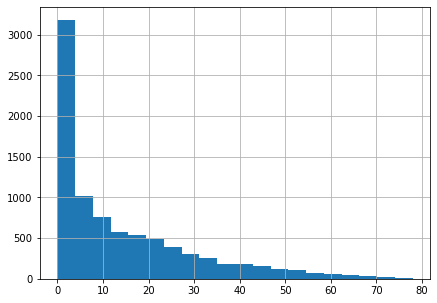

In [137]:
## check out distribution of popularity
df.Popularity.hist(bins=20, figsize=(7,5));

### TensorFlow Implementation
https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/

In [144]:
learning_rate = 0.01

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):

  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)

    return ds
  return input_function

In [145]:
## define our columns, all of which are numeric
NUMERIC_COLUMNS = [t for t in df.columns if t != "Popularity"]

feature_columns = []
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [146]:
train_input_fn = make_input_fn(train, y_train)
test_input_fn = make_input_fn(test, y_test, num_epochs=1, shuffle=False)

In [147]:
feature_columns

[NumericColumn(key='ArtistName', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='KeySignatureConfidence', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TimeSignatureConfidence', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Year', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='danceability', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='energy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='key', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='loudness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='mode', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='speechiness', shape=(1,), default_value=No

In [148]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)

linear_est.train(train_input_fn)
result = linear_est.evaluate(test_input_fn)
print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/hp/wm0m2mjn6438dflpwssbnkn80000gn/T/tmppymrmlky', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INF

/opt/anaconda3/envs/MSD/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


UsageError: Line magic function `%tensorboard` not found.


In [149]:
model = tf.keras.Sequential()

model.add(Input(shape=(df.shape[1]-1,)))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation='linear'))



model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error", "mean_absolute_error"])

In [150]:
history = model.fit(train, y_train, batch_size=2, epochs=100, verbose=1)

Epoch 1/100
3400/3400 [==============================] - 2s 512us/step - loss: 55285716.9668 - mean_squared_error: 55285716.9668 - mean_absolute_error: 2525.6606

In [151]:
pred_train = model.predict(train)
print("RMSE_train:", np.sqrt(mean_squared_error(y_train, pred_train)))
print("MSE_train:", mean_squared_error(y_train, pred_train))
print("MAE_train:", mean_absolute_error(y_train, pred_train))

print("\n")
pred = model.predict(test)
print("RMSE_test", np.sqrt(mean_squared_error(y_test, pred)))
print("MSE_test", mean_squared_error(y_test, pred))
print("MAE_test:", mean_absolute_error(y_test, pred))

RMSE_train: 16.170007436645584
MSE_train: 261.4691405011735
MAE_train: 12.847464059100432




ValueError: Input contains NaN, infinity or a value too large for dtype('float32').